In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
np.random.seed(0)

In [6]:
df_train = pd.read_csv('../data/train_iris.csv')
df_test = pd.read_csv('../data/test_iris.csv')
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [7]:
df_train.head()

,sepal length,sepal width,petal length,petal width,species
0,7.4,2.8,6.1,1.9,2
1,5.0,3.4,1.5,0.2,0
2,4.8,3.4,1.6,0.2,0
3,5.8,2.7,5.1,1.9,2
4,7.2,3.6,6.1,2.5,2


In [20]:
y_train = df_train['species']
X_train = df_train.drop(['species'], axis=1)

y_test = df_test['species']
X_test = df_test.drop(['species'], axis=1)

scores_data = pd.DataFrame()
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data_long = pd.melt(
    scores_data, 
    id_vars=['depth'], 
    value_vars=['train_score', 'test_score'],
    var_name='type',
    value_name='score'
)

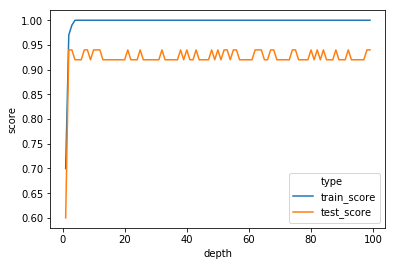

In [22]:
sb.lineplot(x='depth', y='score', hue='type', data=scores_data_long)